In [1]:

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.preprocessing import StandardScaler


In [2]:
labmap = {0: "n02089078-black-and-tan_coonhound"
          ,1: "n02091831-Saluki"
          ,2:"n02092002-Scottish_deerhound"
          ,3:"n02095314-wire-haired_fox_terrier"}

paths = [r'../DataSet/ProcessedDatasets/n02089078-black-and-tan_coonhound/'
         ,r'../DataSet/ProcessedDatasets/n02091831-Saluki/'
         ,r'../DataSet/ProcessedDatasets/n02092002-Scottish_deerhound/'
         ,r'../DataSet/ProcessedDatasets/n02095314-wire-haired_fox_terrier/']

data_set = []
labels = []
for i in paths:
    for dog in os.listdir(i):
        img = cv2.imread(i + dog,cv2.IMREAD_GRAYSCALE)
        hist = cv2.calcHist(img, [0], None, [256], [0, 256])
        data_set.append(hist)
        labels.append(paths.index(i))

standard_dset = StandardScaler().fit_transform(np.array(data_set)[:,:,0])

labels = np.array(labels)

final_data = np.column_stack((standard_dset, labels))

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = [], [], [], []

for i in labmap.keys():
    class_indices = np.where(labels == i)[0]
    X_class = standard_dset[class_indices]
    y_class = labels[class_indices]
    X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2)
    X_train.extend(X_train_class)
    X_test.extend(X_test_class)
    y_train.extend(y_train_class)
    y_test.extend(y_test_class)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


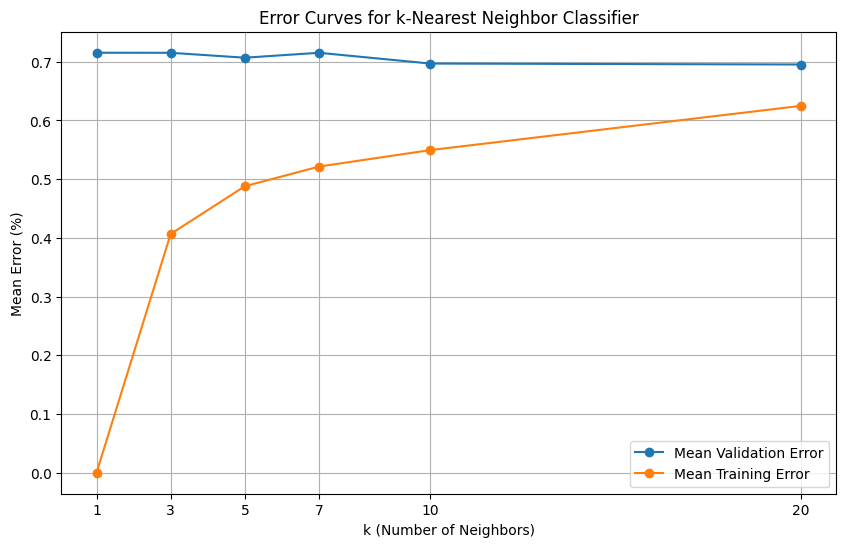

Best k (lowest mean validation error): 20
Test Error for k=20: 67.55%


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

k_values = [1, 3, 5, 7, 10, 20]

mean_validation_errors = []
mean_training_errors = []

best_k_values = []

test_errors = []

num_folds = 5
kf = StratifiedKFold(n_splits=num_folds)

for k in k_values:
    validation_errors = []
    training_errors = []
    for train_index, val_index in kf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_fold, y_train_fold)

        validation_error = 1 - knn.score(X_val_fold, y_val_fold)
        training_error = 1 - knn.score(X_train_fold, y_train_fold)

        validation_errors.append(validation_error)
        training_errors.append(training_error)

    mean_validation_error = np.mean(validation_errors)
    mean_training_error = np.mean(training_errors)

    mean_validation_errors.append(mean_validation_error)
    mean_training_errors.append(mean_training_error)

    best_k = k_values[np.argmin(mean_validation_errors)]
    best_k_values.append(best_k)

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_validation_errors, marker='o', label='Mean Validation Error')
plt.plot(k_values, mean_training_errors, marker='o', label='Mean Training Error')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Error (%)')
plt.legend()
plt.title('Error Curves for k-Nearest Neighbor Classifier')
plt.xticks(k_values)
plt.grid(True)
plt.show()

best_k = k_values[np.argmin(mean_validation_errors)]

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

test_error = 1 - best_knn.score(X_test, y_test)
test_errors.append(test_error)

print(f'Best k (lowest mean validation error): {best_k}')
print(f'Test Error for k={best_k}: {test_error * 100:.2f}%')


C:\Users\yagna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yagna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yagna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yagna\A

Confusion Matrix - Naive Bayes
[[ 7.6  3.2  7.   7.6]
 [ 5.4  8.   6.2 12.4]
 [ 8.   5.4 10.  13.6]
 [ 5.2  5.   2.8 12. ]]
Confusion Matrix - Neural Network
[[ 5.4  6.   8.8  5.2]
 [ 6.2 10.2  9.4  6.2]
 [ 8.4 12.6  9.8  6.2]
 [ 4.   6.   8.4  6.6]]
Confusion Matrix - Random Forest
[[ 6.   3.6 13.   2.8]
 [ 3.   8.4 14.8  5.8]
 [ 5.  11.  16.8  4.2]
 [ 2.6  7.8 10.   4.6]]


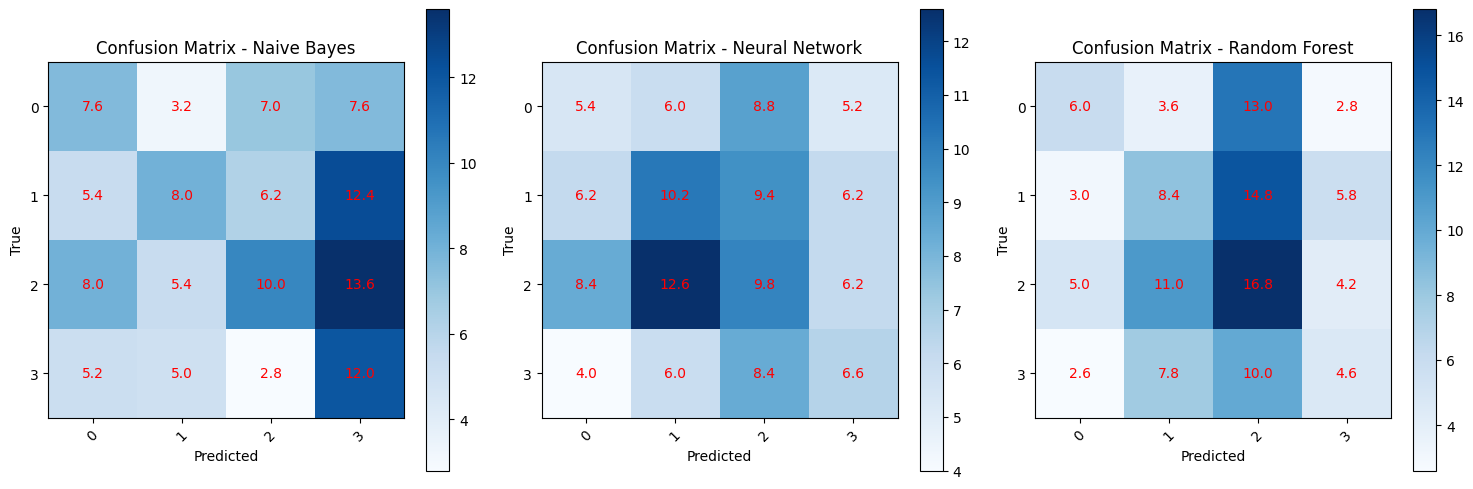

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

class_labels = np.unique(y_train)  

naive_bayes = GaussianNB()
neural_network = MLPClassifier(hidden_layer_sizes=(10, 10, 10))
random_forest = RandomForestClassifier()

models = [naive_bayes, neural_network, random_forest]
model_names = ['Naive Bayes', 'Neural Network', 'Random Forest']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

confusion_matrices = []

for model, model_name in zip(models, model_names):
    fold_matrices = [] 

    for train_index, val_index in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        model.fit(X_train_fold, y_train_fold)

        y_pred = model.predict(X_val_fold)
        fold_matrix = confusion_matrix(y_val_fold, y_pred, labels=class_labels)
        fold_matrices.append(fold_matrix)

    confusion_matrices.append(fold_matrices)

plt.figure(figsize=(15, 5))
for i, model_name in enumerate(model_names):
    plt.subplot(1, 3, i + 1)
    average_matrix = np.mean(confusion_matrices[i], axis=0)
    plt.imshow(average_matrix, cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.colorbar()
    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels, rotation=45)
    plt.yticks(tick_marks, class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')

    for i in range(len(class_labels)):
        for j in range(len(class_labels)):
            plt.text(j, i, f'{average_matrix[i, j]}', ha='center', va='center', color='red')
            
    print(f'Confusion Matrix - {model_name}')
    print(average_matrix)

plt.tight_layout()
plt.show()


In [6]:
from sklearn.metrics import accuracy_score, f1_score

y_true = y_test

y_pred_naive_bayes = models[0].predict(X_test)
y_pred_neural_network = models[1].predict(X_test)
y_pred_random_forest = models[2].predict(X_test)

accuracy_naive_bayes = accuracy_score(y_true, y_pred_naive_bayes)
accuracy_neural_network = accuracy_score(y_true, y_pred_neural_network)
accuracy_random_forest = accuracy_score(y_true, y_pred_random_forest)

f1_naive_bayes = f1_score(y_true, y_pred_naive_bayes, average='weighted')
f1_neural_network = f1_score(y_true, y_pred_neural_network, average='weighted')
f1_random_forest = f1_score(y_true, y_pred_random_forest, average='weighted')

print(f"Test Accuracy - Naive Bayes: {accuracy_naive_bayes * 100:.2f}%")
print(f"Test Accuracy - Neural Network: {accuracy_neural_network * 100:.2f}%")
print(f"Test Accuracy - Random Forest: {accuracy_random_forest * 100:.2f}%")

print(f"F-Measure - Naive Bayes: {f1_naive_bayes:.4f}")
print(f"F-Measure - Neural Network: {f1_neural_network:.4f}")
print(f"F-Measure - Random Forest: {f1_random_forest:.4f}")


Test Accuracy - Naive Bayes: 29.80%
Test Accuracy - Neural Network: 25.83%
Test Accuracy - Random Forest: 40.40%
F-Measure - Naive Bayes: 0.2817
F-Measure - Neural Network: 0.2590
F-Measure - Random Forest: 0.3921
